In [1]:
!pip install yfinance
!pip install nltk
!pip install vaderSentiment
!pip install requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [9]:
#Collect Stock Data
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import requests

# Specify the start and end dates
start_date = "2024-02-05"
end_date = datetime.now().strftime('%Y-%m-%d')

# Collect Nvidia stock data from the specified date range
nvidia_stock = yf.Ticker("NVDA")
stock_data = nvidia_stock.history(start=start_date, end=end_date)
stock_data.reset_index(inplace=True)
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-02-05 00:00:00-05:00,68.199390,69.470916,67.179776,69.305977,680078000,0.0,0.0
1,2024-02-06 00:00:00-05:00,69.603865,69.727819,66.275121,68.197395,683111000,0.0,0.0
2,2024-02-07 00:00:00-05:00,68.293347,70.193634,67.574615,70.072678,495575000,0.0,0.0
3,2024-02-08 00:00:00-05:00,70.047689,70.767420,69.428926,69.614853,414422000,0.0,0.0
4,2024-02-09 00:00:00-05:00,70.506528,72.157909,70.185650,72.105934,436637000,0.0,0.0


In [10]:
stock_data


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-02-05 00:00:00-05:00,68.199390,69.470916,67.179776,69.305977,680078000,0.0,0.0
1,2024-02-06 00:00:00-05:00,69.603865,69.727819,66.275121,68.197395,683111000,0.0,0.0
2,2024-02-07 00:00:00-05:00,68.293347,70.193634,67.574615,70.072678,495575000,0.0,0.0
3,2024-02-08 00:00:00-05:00,70.047689,70.767420,69.428926,69.614853,414422000,0.0,0.0
4,2024-02-09 00:00:00-05:00,70.506528,72.157909,70.185650,72.105934,436637000,0.0,0.0
...,...,...,...,...,...,...,...,...
323,2025-05-20 00:00:00-04:00,134.289993,134.580002,132.619995,134.380005,161514200,0.0,0.0
324,2025-05-21 00:00:00-04:00,133.059998,137.399994,130.589996,131.800003,270608700,0.0,0.0
325,2025-05-22 00:00:00-04:00,132.229996,134.250000,131.550003,132.830002,187344000,0.0,0.0
326,2025-05-23 00:00:00-04:00,130.000000,132.679993,129.160004,131.289993,198821300,0.0,0.0


In [11]:
api_key = '7b468408067743b89eebad3e9018f624'


url = 'https://newsapi.org/v2/everything'
params = {
    'q': 'Nvidia',
    'from': (datetime.now() - timedelta(days=28)).strftime('%Y-%m-%d'),  # Get articles from the last 30 days
    'sortBy': 'relevancy',
    'apiKey': api_key,
    'pageSize': 100,  # Maximum number of results per page
    'language': 'en'
}

# Make the request
response = requests.get(url, params=params)
data = response.json()

# Check for errors
if data['status'] != 'ok':
    raise Exception(f"NewsAPI error: {data['message']}")

# Extract articles
articles = data['articles']

# Convert to DataFrame
news_data = pd.DataFrame(articles)
news_data = news_data[['publishedAt', 'title']]
news_data.columns = ['date', 'headline']



In [12]:
news_data

,date,headline
0,2025-04-30T13:19:12Z,Nvidia’s new tool can turn 3D scenes into AI i...
1,2025-05-08T09:38:37Z,Lenovo’s flagship gaming laptop has a 2D / 3D ...
2,2025-05-14T10:40:56Z,Nvidia’s flattery of Trump wins reversal of AI...
3,2025-05-14T17:51:34Z,Switch 2 spec breakdown digs into its processo...
4,2025-05-02T10:00:00Z,The Climate Crisis Threatens Supply Chains. Ma...
...,...,...
93,2025-05-14T04:17:01Z,Palantir CEO Alex Karp praises Saudi engineers...
94,2025-05-17T20:42:53Z,Trump says Bob Iger visited his office to disc...
95,2025-05-22T07:44:30Z,Sergey Brin says management is the 'easiest th...
96,2025-05-12T17:54:59Z,Not just MTG: This House Democrat plunged tens...


In [13]:
# Preprocess news headlines
nltk.download('punkt_tab')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

news_data['cleaned_headline'] = news_data['headline'].apply(preprocess_text)

# Perform sentiment analysis
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

news_data['sentiment_score'] = news_data['cleaned_headline'].apply(get_sentiment_score)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
news_data

,date,headline,cleaned_headline,sentiment_score
0,2025-04-30T13:19:12Z,Nvidia’s new tool can turn 3D scenes into AI i...,Nvidia new tool turn scenes AI images,0.0000
1,2025-05-08T09:38:37Z,Lenovo’s flagship gaming laptop has a 2D / 3D ...,Lenovo flagship gaming laptop screen carbon fi...,0.1027
2,2025-05-14T10:40:56Z,Nvidia’s flattery of Trump wins reversal of AI...,Nvidia flattery Trump wins reversal AI chip li...,0.6249
3,2025-05-14T17:51:34Z,Switch 2 spec breakdown digs into its processo...,Switch spec breakdown digs processor GameChat,0.0000
4,2025-05-02T10:00:00Z,The Climate Crisis Threatens Supply Chains. Ma...,Climate Crisis Threatens Supply Chains Manufac...,-0.2732
...,...,...,...,...
93,2025-05-14T04:17:01Z,Palantir CEO Alex Karp praises Saudi engineers...,Palantir CEO Alex Karp praises Saudi engineers...,0.5267
94,2025-05-17T20:42:53Z,Trump says Bob Iger visited his office to disc...,Trump says Bob Iger visited office discuss Dis...,0.0000
95,2025-05-22T07:44:30Z,Sergey Brin says management is the 'easiest th...,Sergey Brin says management thing AI,0.0000
96,2025-05-12T17:54:59Z,Not just MTG: This House Democrat plunged tens...,MTG House Democrat plunged tens thousands doll...,0.0000


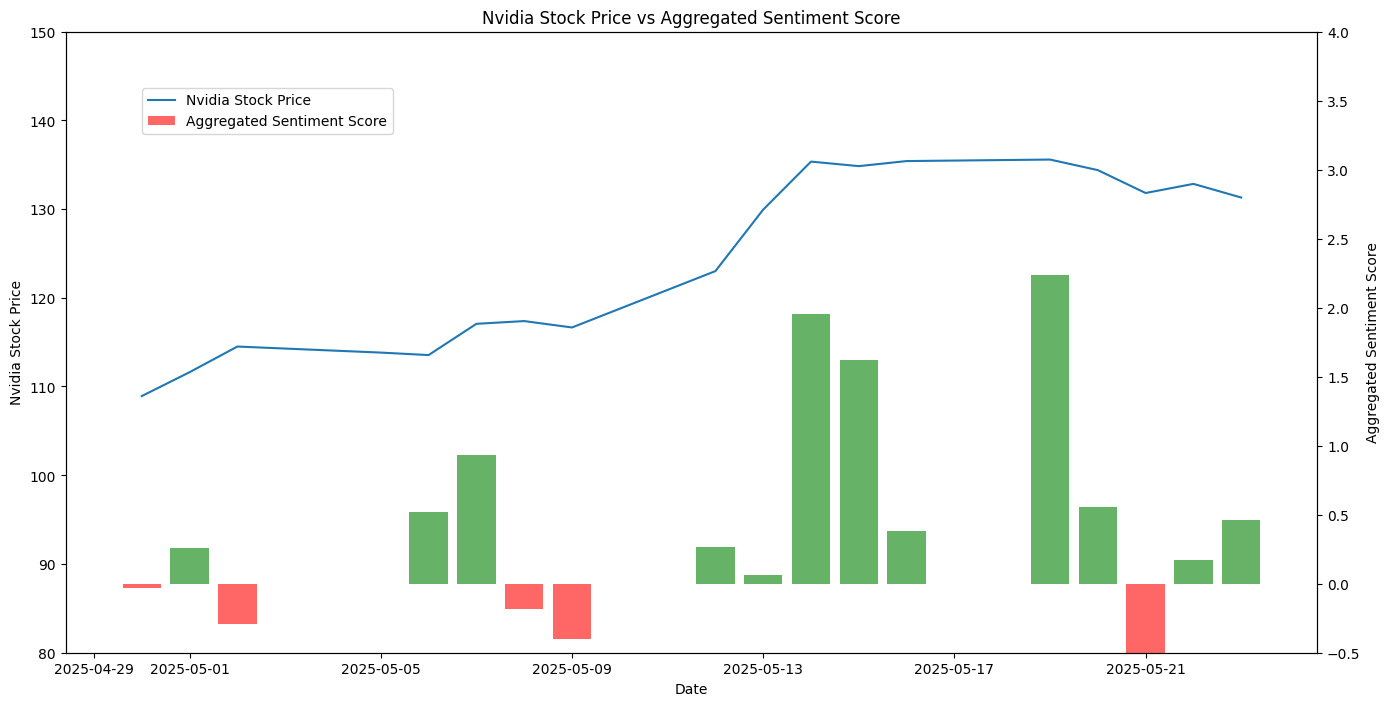

In [15]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

news_data['sentiment_score'] = news_data['cleaned_headline'].apply(get_sentiment_score)

# Convert dates to datetime format
news_data['date'] = pd.to_datetime(news_data['date']).dt.date
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date

# Aggregate sentiment scores by date
aggregated_sentiment = news_data.groupby('date')['sentiment_score'].sum().reset_index()

# Merge stock data with aggregated sentiment scores
combined_data = pd.merge(stock_data, aggregated_sentiment, left_on='Date', right_on='date', how='inner')

# Visualize the data with a secondary y-axis and bar plot for aggregated sentiment scores
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Nvidia Stock Price')
ax1.plot(combined_data['Date'], combined_data['Close'], label='Nvidia Stock Price')
ax1.tick_params(axis='y')
ax1.set_ylim(80, 150)  # Set the left y-axis range

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Aggregated Sentiment Score')

# Use different colors for positive and negative bar values
colors = ['green' if val >= 0 else 'red' for val in combined_data['sentiment_score']]
ax2.bar(combined_data['Date'], combined_data['sentiment_score'], label='Aggregated Sentiment Score', color=colors, alpha=0.6)
ax2.tick_params(axis='y')
ax2.set_ylim(-0.5, 4)  # Set the right y-axis range

fig.tight_layout()
plt.title('Nvidia Stock Price vs Aggregated Sentiment Score')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.show()
